In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn import metrics

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [3]:
# Define the features and the outcome
# make sure data are evenly divided
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2 
df = heartdisease_df.iloc[:rows, :]

X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)


scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [4]:
gmm_cluster=GaussianMixture(n_components=2,random_state=122)
clusters=gmm_cluster.fit_predict(X_std)

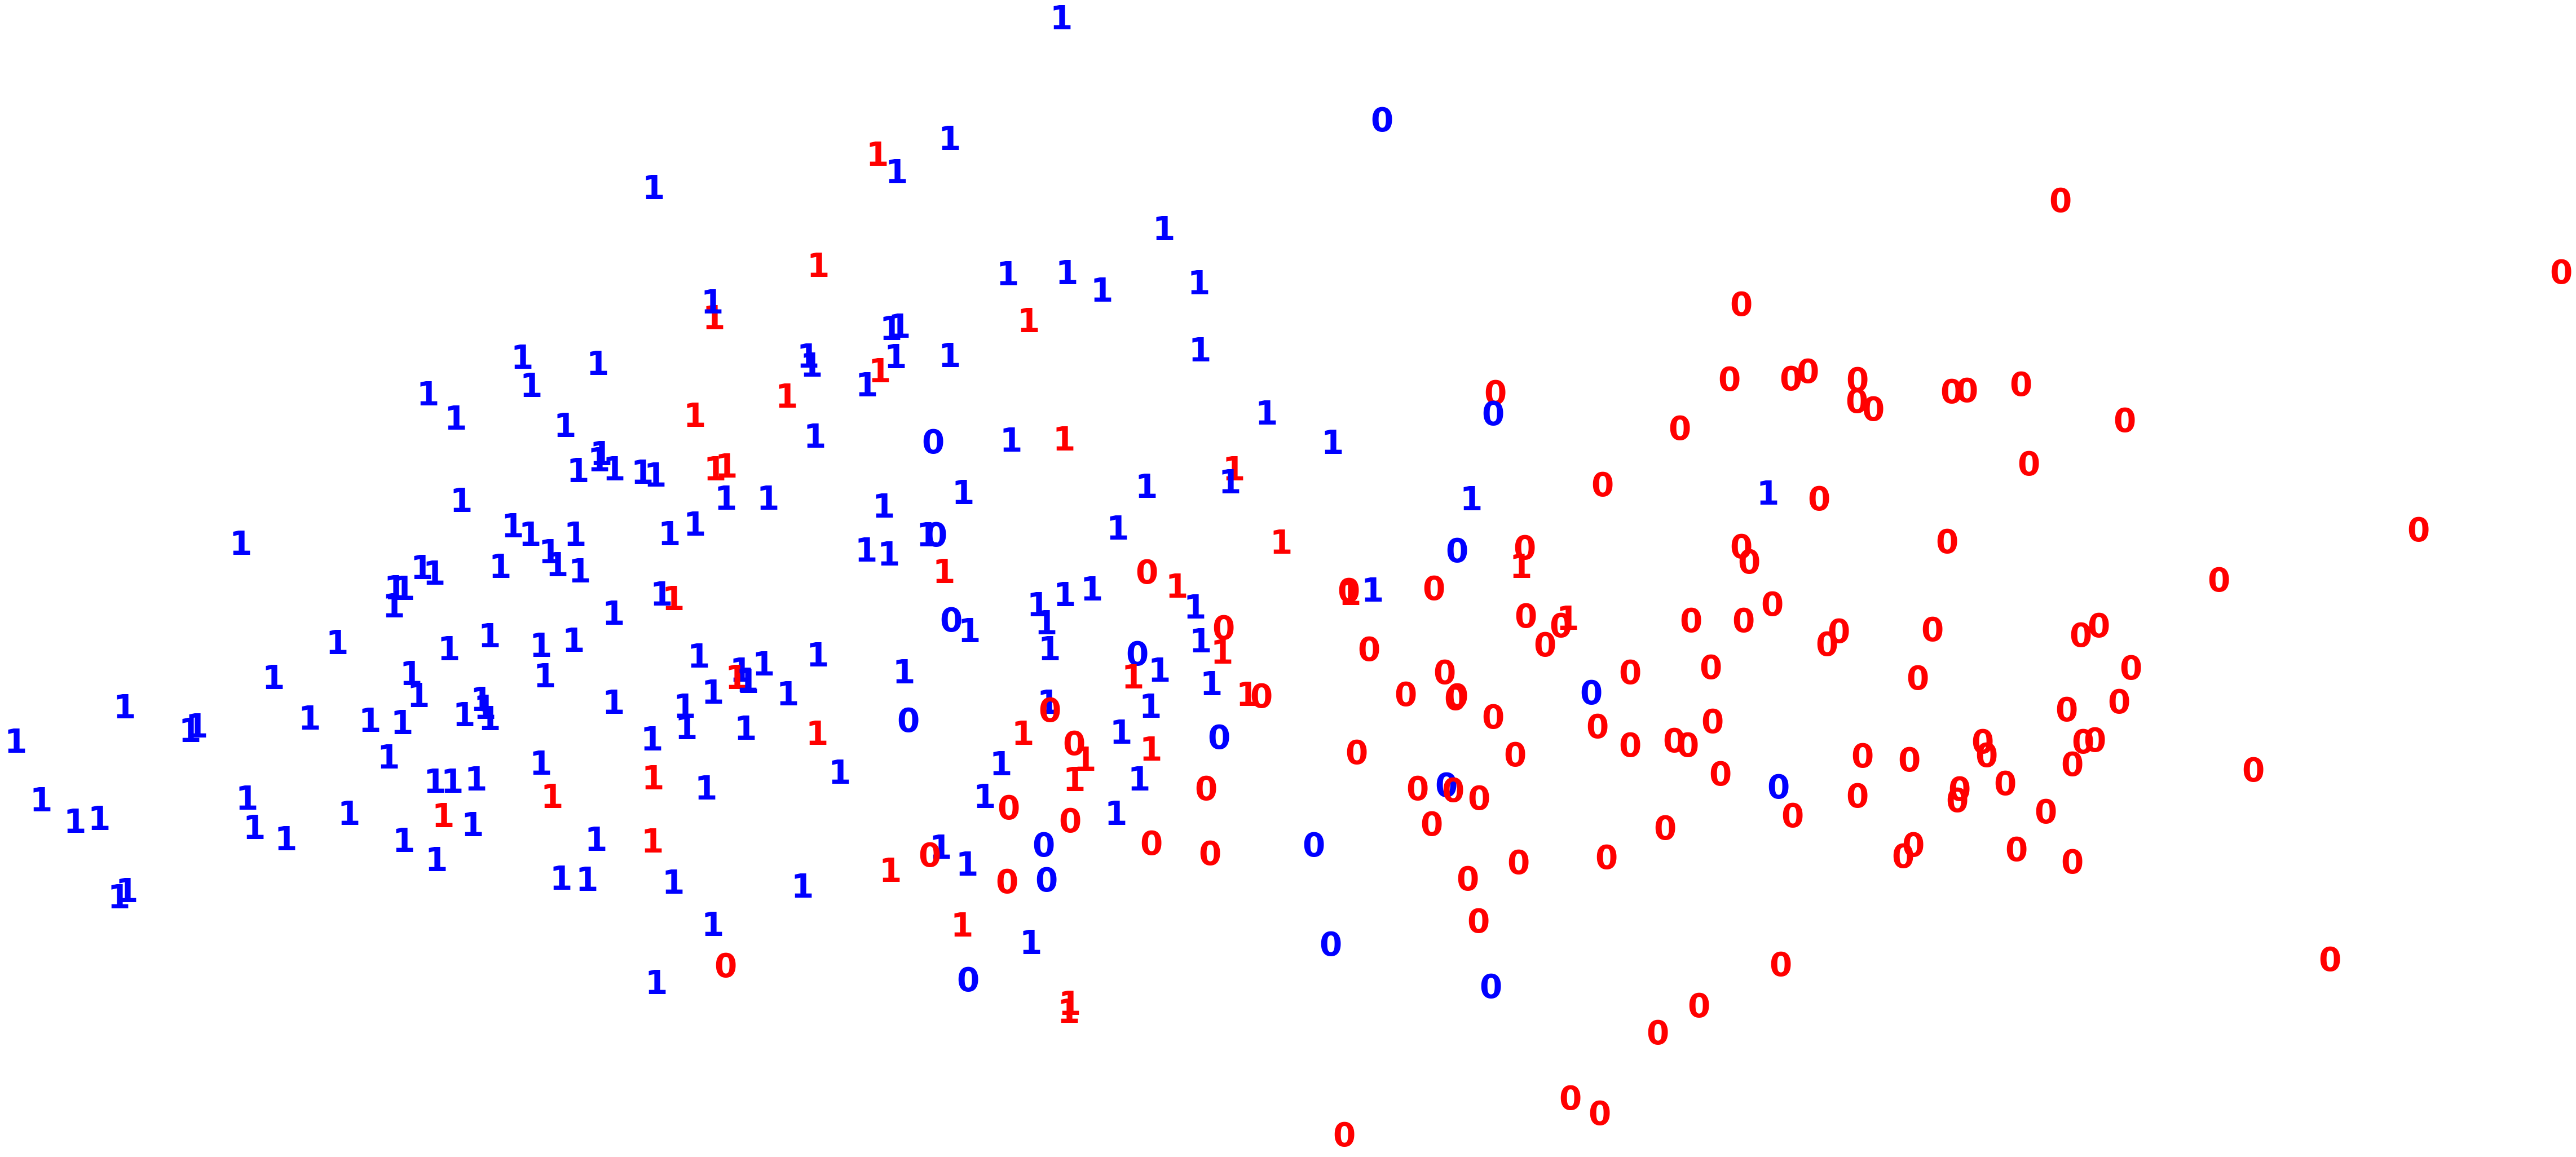

In [5]:
pca=PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours='rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(clusters[i]),
            color=colours[y[i]], fontdict={"weight": "bold", "size" : 58})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [6]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.41922773658819823
The silhoutte score of the GMM solution: 0.160360181671496


In [7]:
# two metrics rand index and silhoutte
print(metrics.adjusted_rand_score(y,clusters))
print(metrics.silhouette_score(X_std, clusters,metric='euclidean'))

0.41922773658819823
0.160360181671496


In [8]:
# these metric results are much better than DBSCAN model results

In [9]:
# contingency table

clusters=np.array([2 if x==1 else 1 if x==0 else 0 for x in clusters])

print(pd.crosstab(y,clusters))

col_0    1    2
row_0          
0      104   35
1       18  145


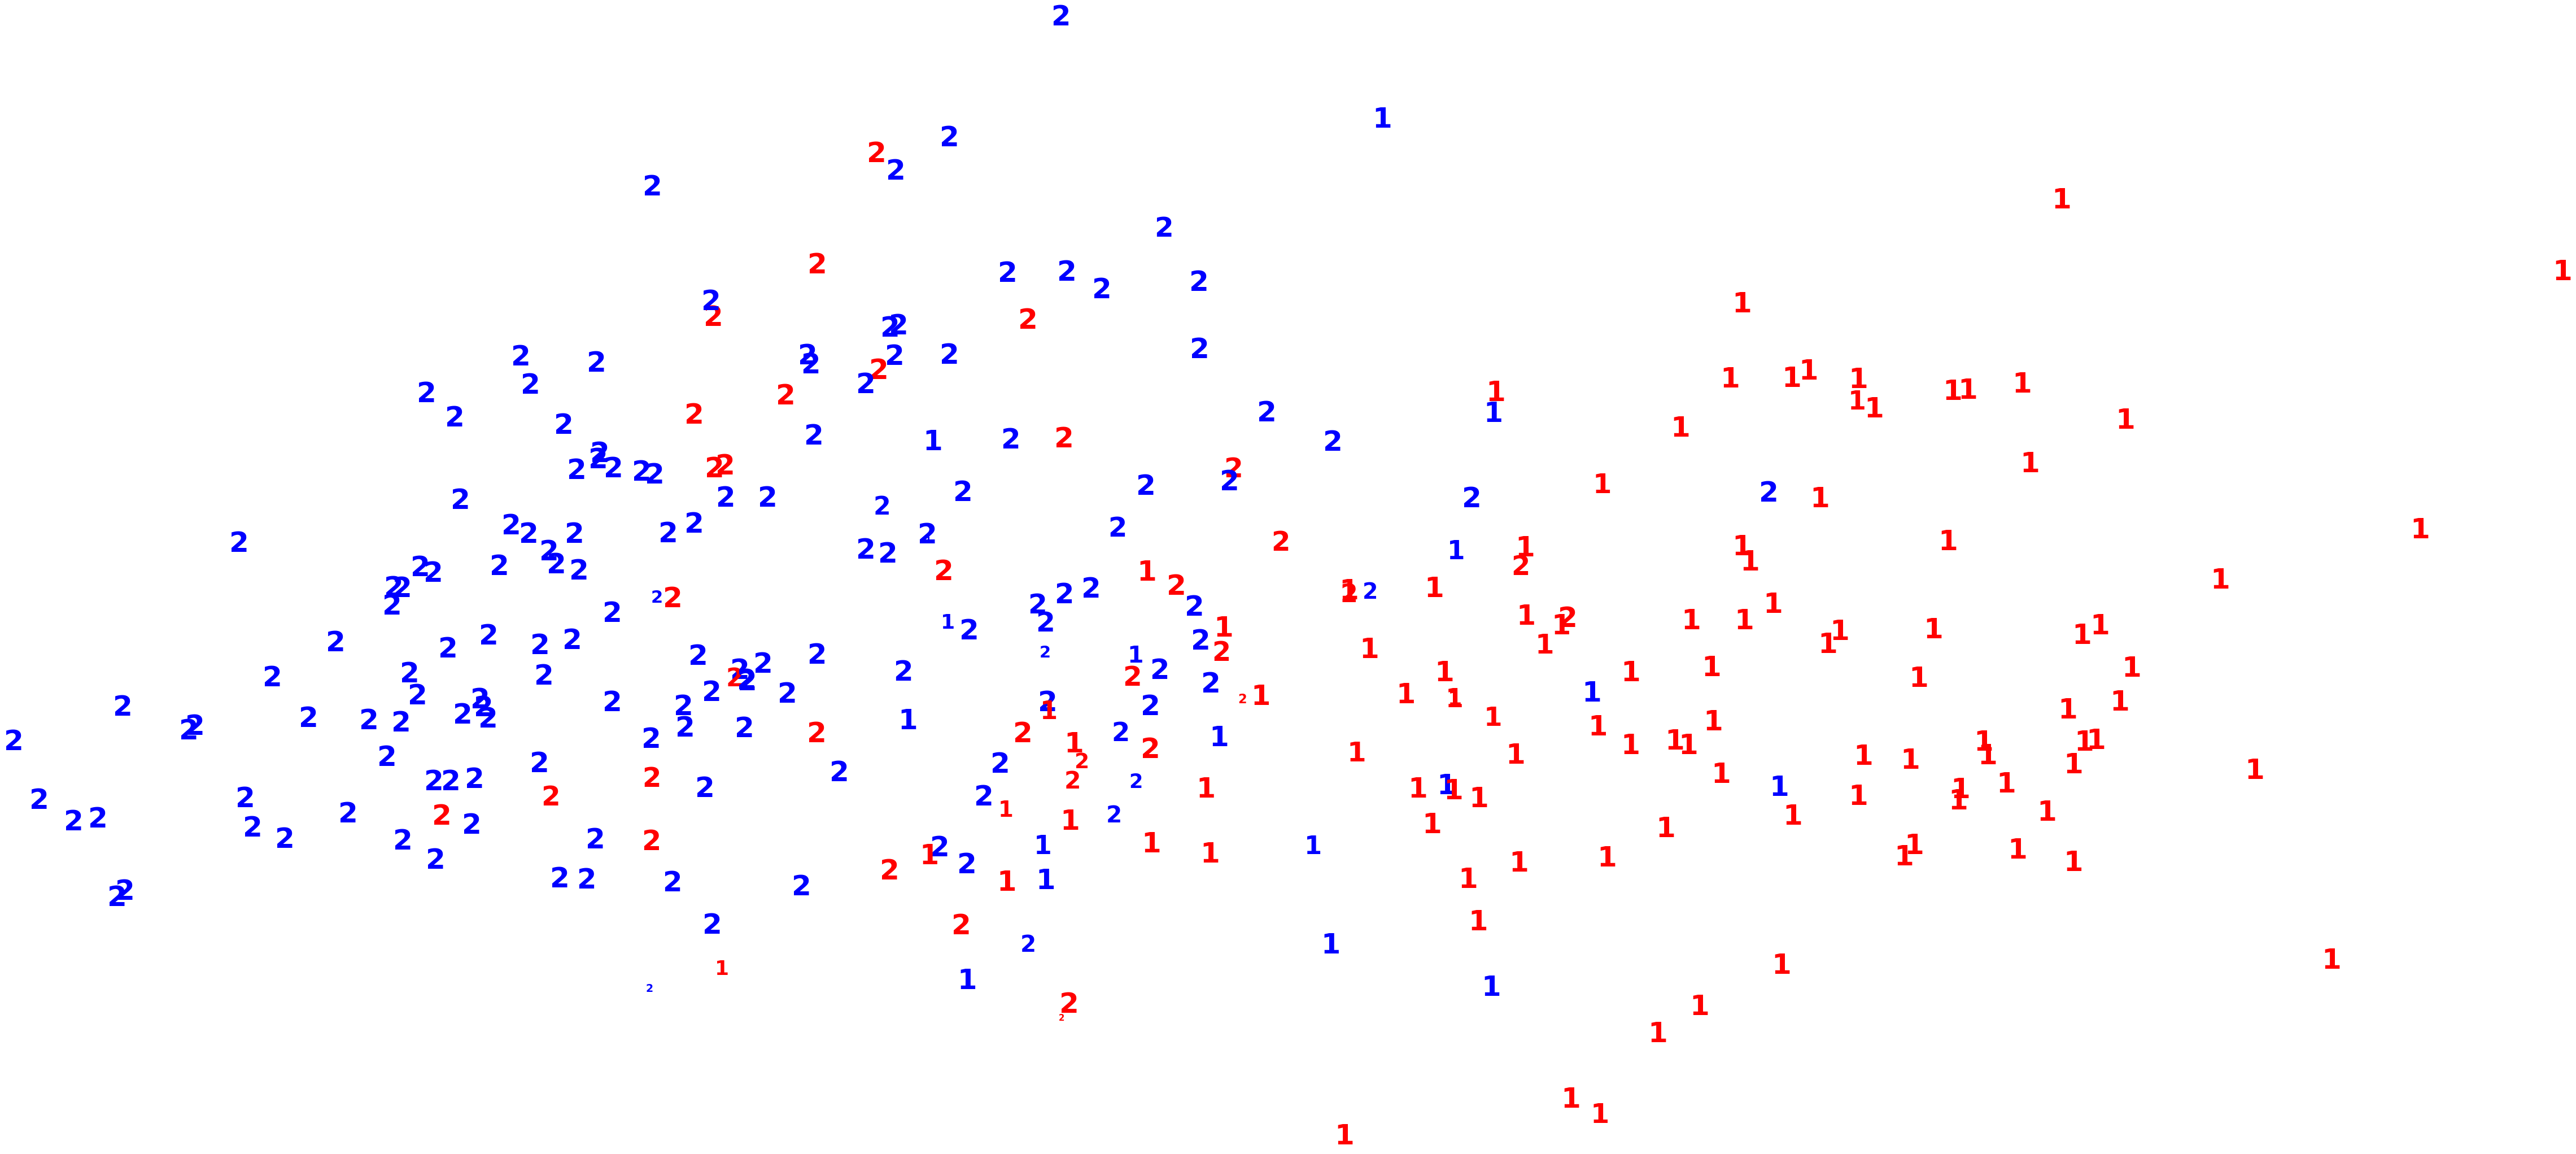

In [10]:
probs=gmm_cluster.predict_proba(X_std)

size=50* probs.max(1)**2

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(clusters[i]),
            color=colours[y[i]],
            fontdict={'weight' : "bold","size" : size[i]})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [11]:
# have question on these two plots, what's the difference???

In [12]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.41922773658819823
The silhoutte score of the GMM solution: 0.160360181671496


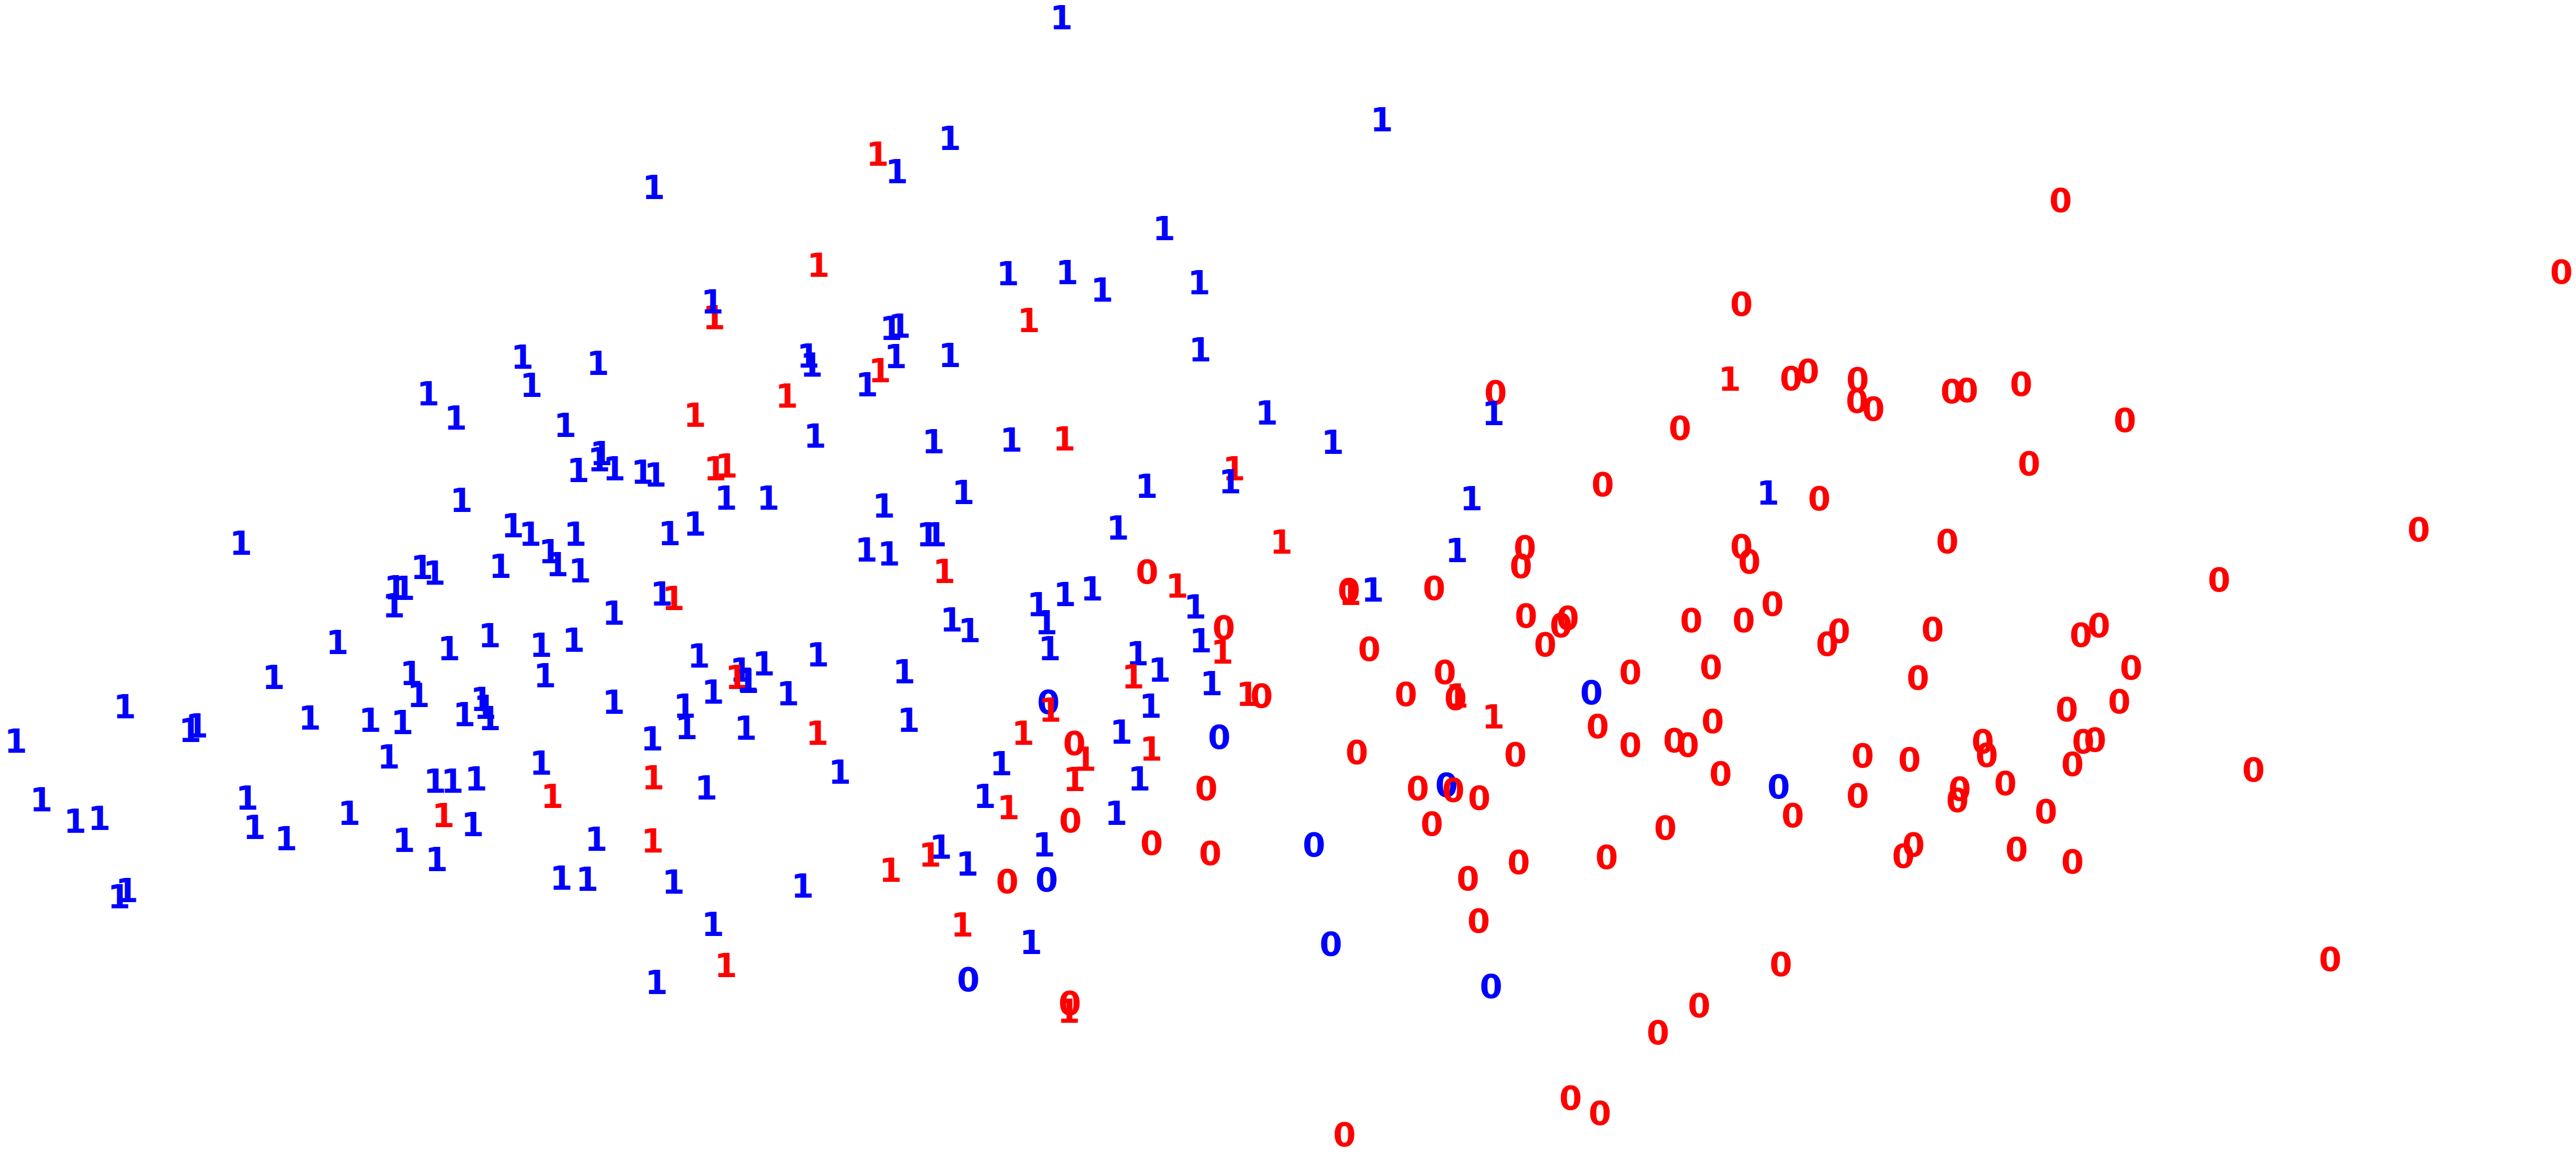

In [13]:
# re apply GMM using convariance type params

gmm_cluster=GaussianMixture(n_components=2,covariance_type = 'tied',random_state=122)
clusters=gmm_cluster.fit_predict(X_std)

pca=PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours='rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(clusters[i]),
            color=colours[y[i]], fontdict={"weight": "bold", "size" : 58})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [14]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.4543732599413319
The silhoutte score of the GMM solution: 0.16631887751571323


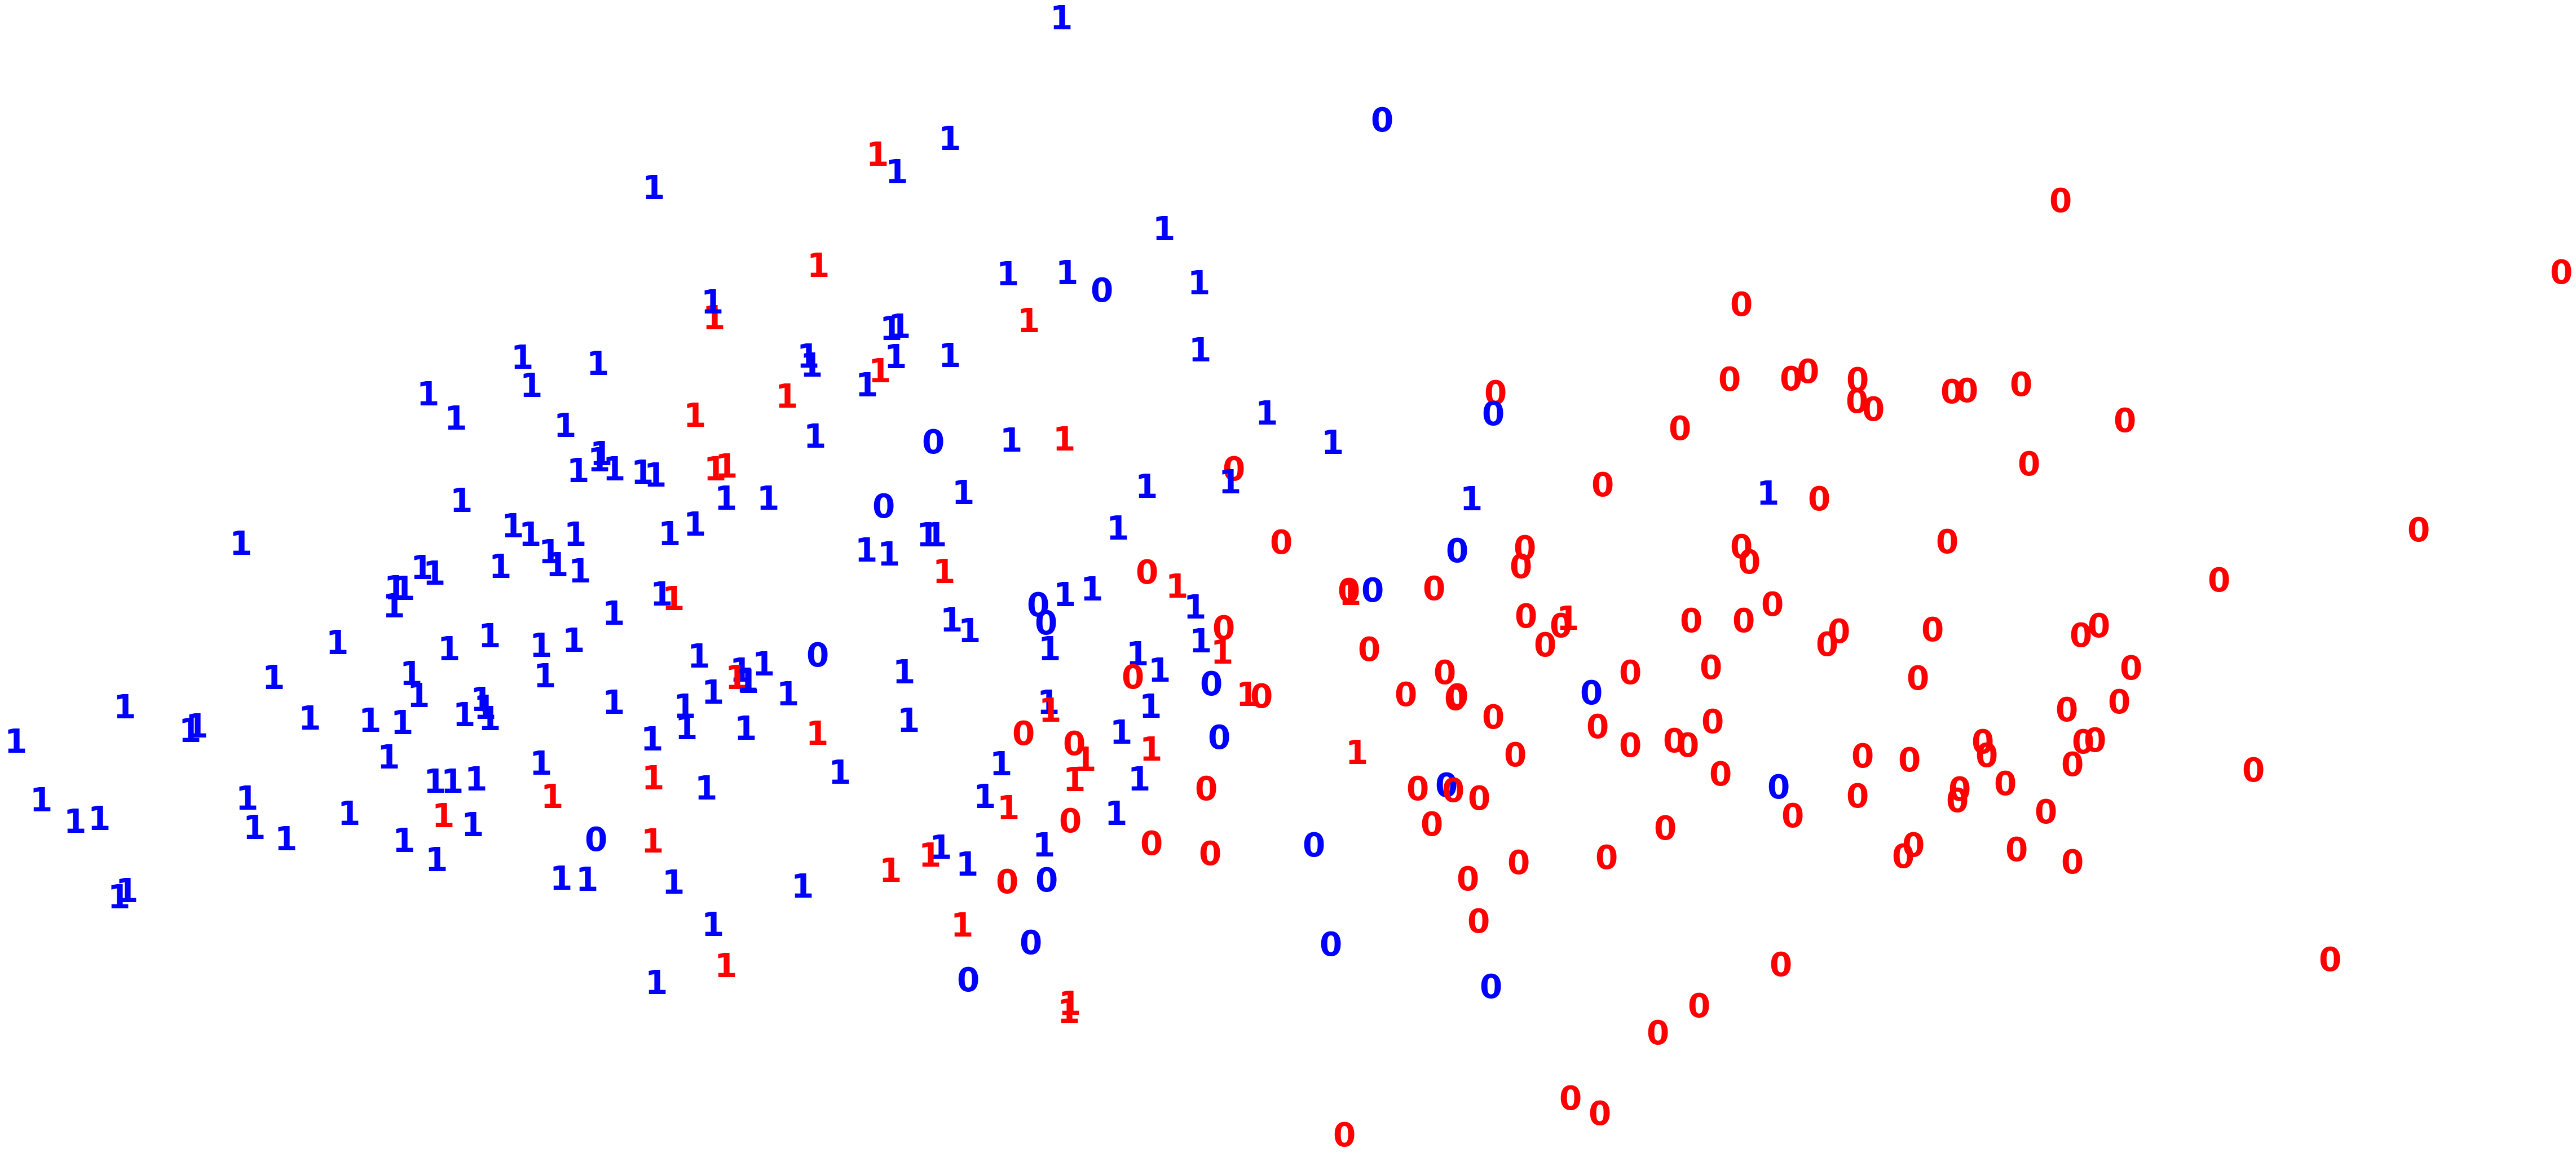

In [15]:
gmm_cluster=GaussianMixture(n_components=2,covariance_type = 'diag',random_state=122)
clusters=gmm_cluster.fit_predict(X_std)

pca=PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours='rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(clusters[i]),
            color=colours[y[i]], fontdict={"weight": "bold", "size" : 58})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [16]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.3854472774058532
The silhoutte score of the GMM solution: 0.15953531240832503


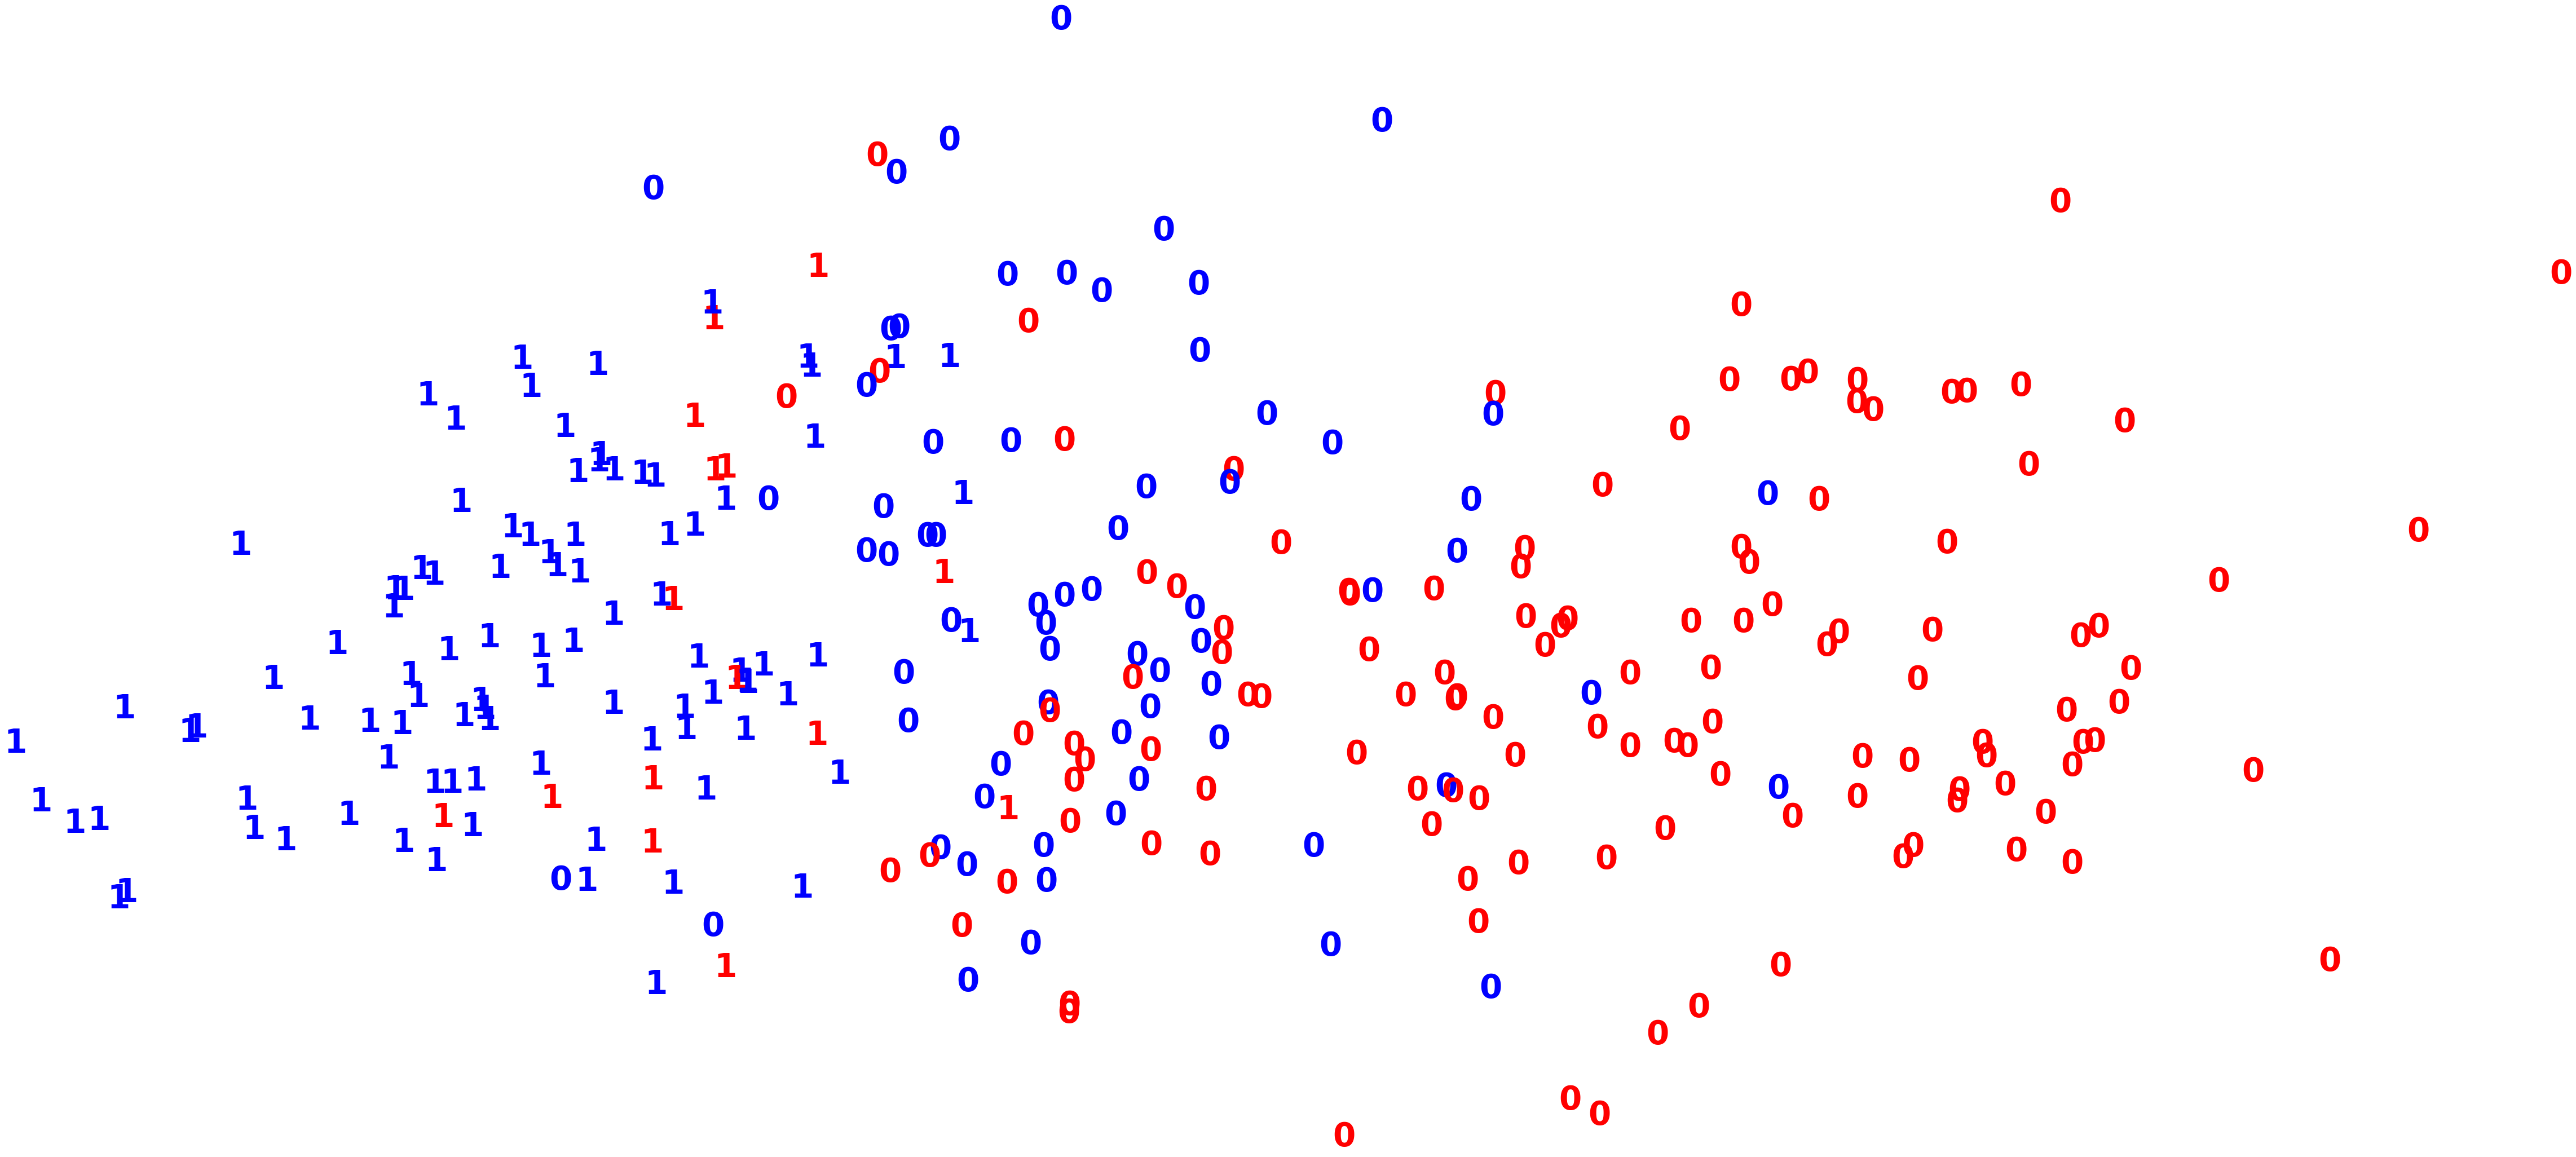

In [17]:
gmm_cluster=GaussianMixture(n_components=2,covariance_type = 'spherical',random_state=122)
clusters=gmm_cluster.fit_predict(X_std)

pca=PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours='rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(clusters[i]),
            color=colours[y[i]], fontdict={"weight": "bold", "size" : 58})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [18]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.2060175349560907
The silhoutte score of the GMM solution: 0.12345483213377387


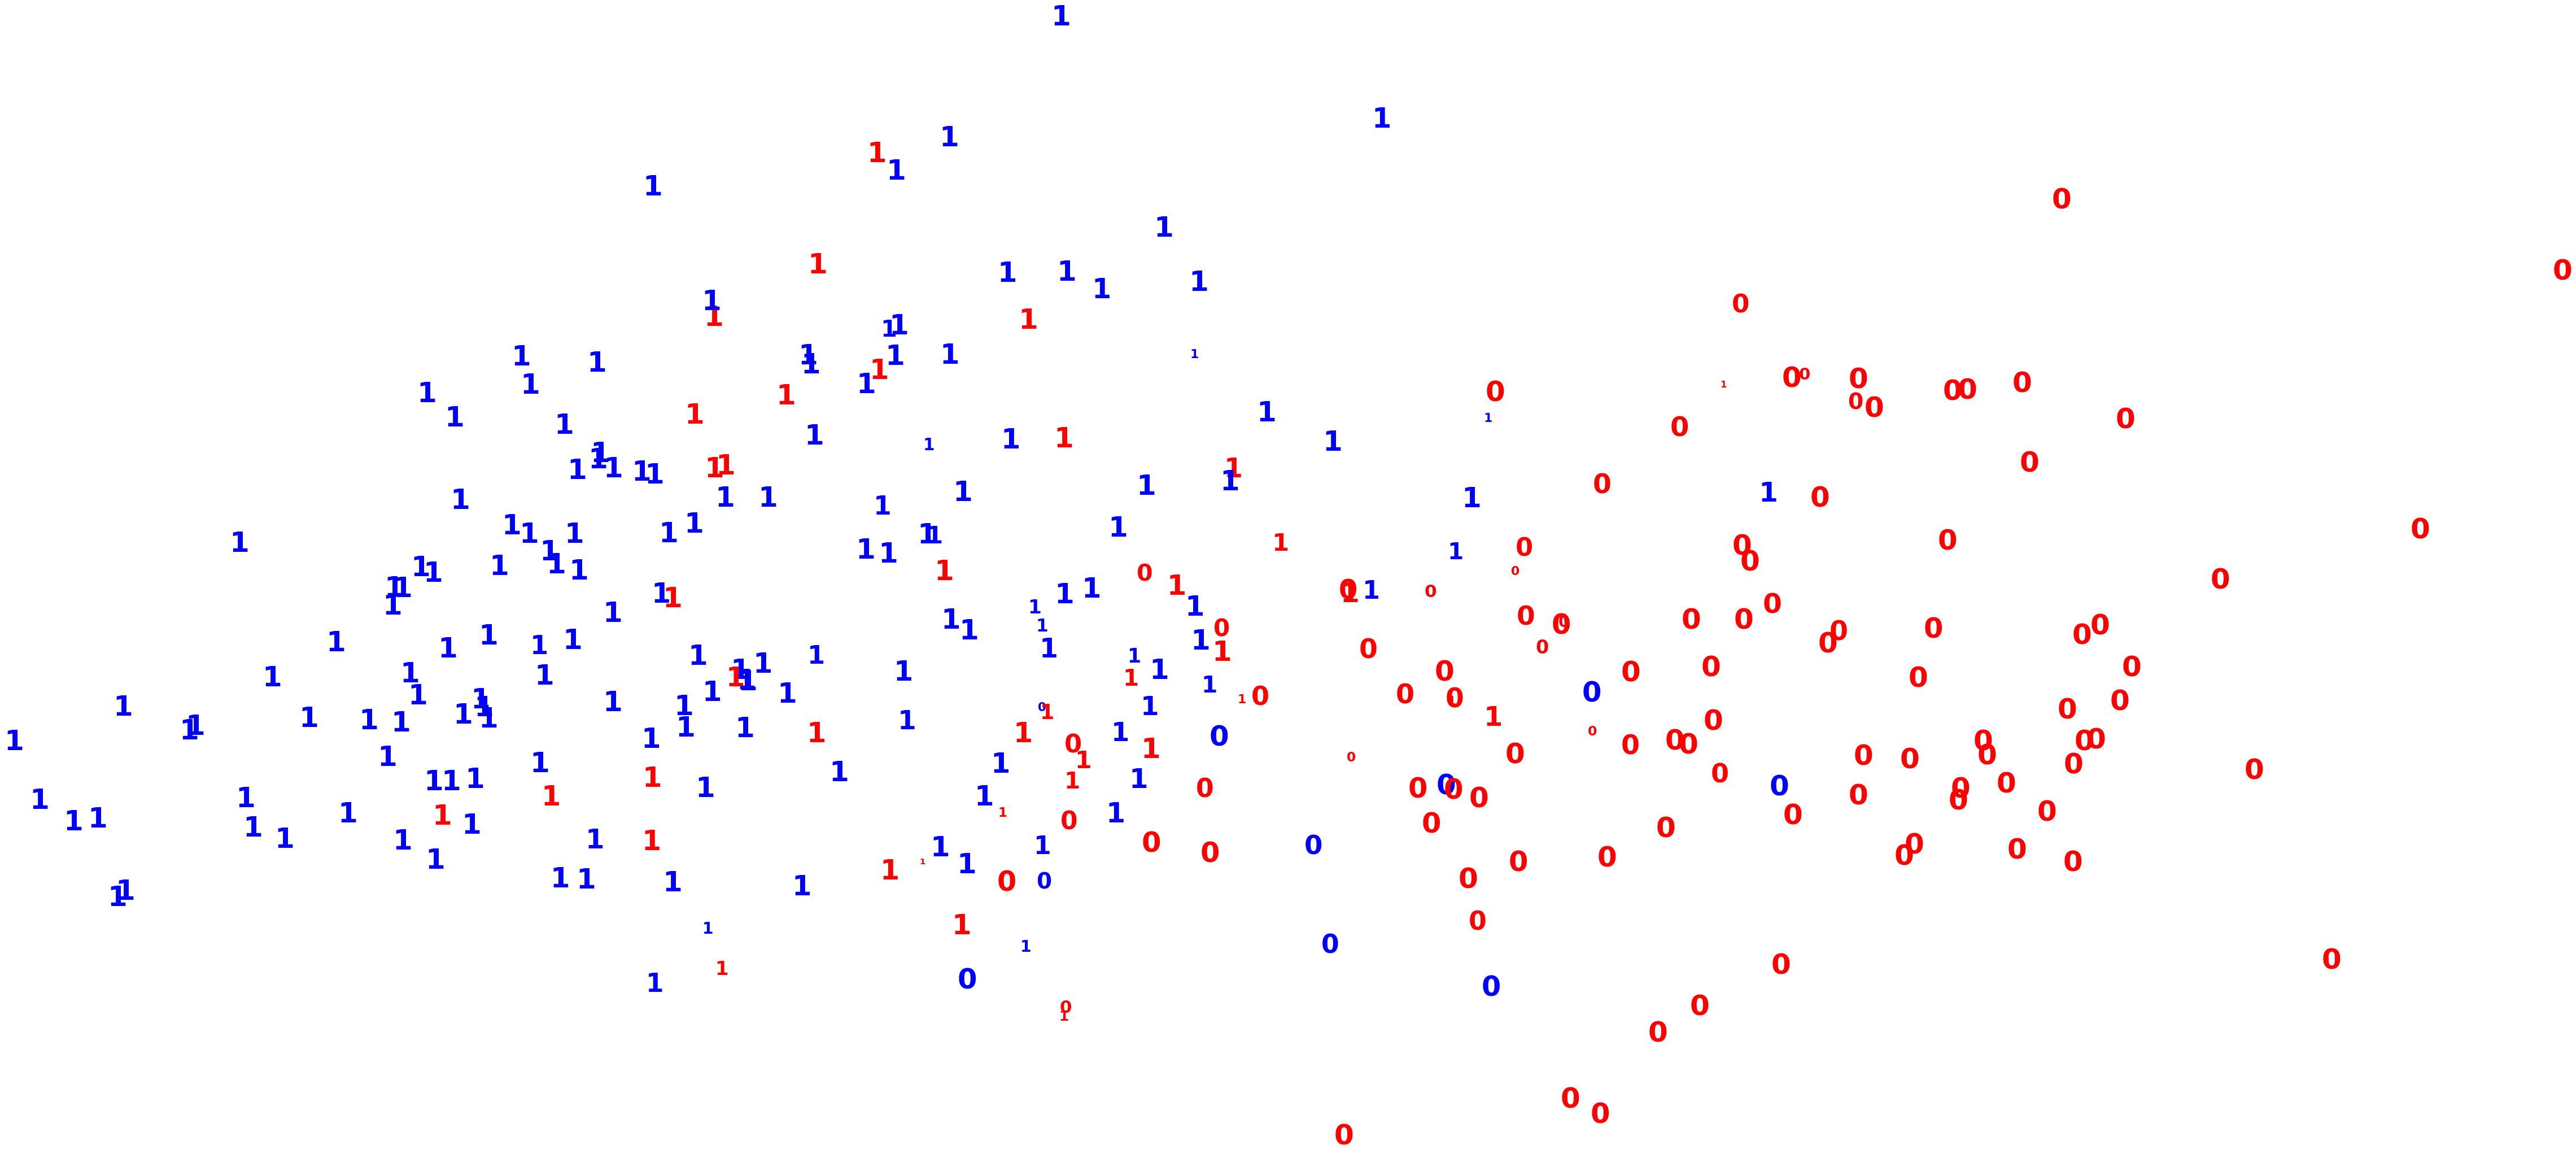

In [23]:
# reapply model using soft clustering with GMM

gmm_cluster=GaussianMixture(n_components=2,covariance_type = 'tied',random_state=122)
clusters=gmm_cluster.fit_predict(X_std)

probs=gmm_cluster.predict_proba(X_std)

size=50* probs.max(1)**2

plt.figure(figsize=(10,5))

for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(clusters[i]),
            color=colours[y[i]],
            fontdict={'weight' : "bold","size" : size[i]})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()